In [48]:
# importação do pandas para trabalhar com calcúlos no modelo
import numpy as np
# importação do pandas para realizar a analisse dos dados
import pandas as pd
from IPython.display import display
# biblioteca do panda com o objetivo de ler CSV´s
from pandas import read_csv
# bilioteca do para manpulação de variaveis de hora
import datetime

import matplotlib.pyplot as plt
# biblioteca de visualização de dados para deixar os gráficos do matplotlib mais bonitos
import seaborn as sns
from matplotlib import pyplot
from matplotlib.pylab import rcParams

import warnings
import itertools

# gráficos gerados sejam mostrados no notebook e não em uma nova janela
%matplotlib inline

# definição do tipo de estilo dos gráficos gerados pelo matplotlib
plt.style.use('bmh')

# importação da bilioteca relativedelt para trabalhar com mamipulação de datas
from dateutil.relativedelta import relativedelta

# importação da função para trabalhar com o statsmodels no modelo de time series forecasting
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

## Decidi rodar um dataset de teste para roda a primeira versão do time series forecasting

qui vou aplicar uma versão de um dataset portland-oregon para construirmos as primeiras implementações do projeto. Aqui estou fazendo o teste de implementação de um modelo ARIMA.

Fonte de referência: https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb

In [49]:
# Fazer a leitura do dataset
data_test = pd.read_csv('portland-oregon-average-monthly-.csv', index_col=0)

In [50]:
# Aqui nos vamos testar o dataset e ler as primeiras linhas
display(data_test.head())

,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630


O dataset portland-oregon é uma base de dados que permite a criação de um modelo de time series forecasting por causa.

In [51]:
data_test.index.name=None
data_test.reset_index(inplace=True)
data_test.drop(data_test.index[114], inplace=True)

In [52]:
start = datetime.datetime.strptime("1973-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,114)]
data_test['index'] =date_list
data_test.set_index(['index'], inplace=True)
data_test.index.name=None

In [53]:
data_test.columns= ['riders']
data_test['riders'] = data_test.riders.apply(lambda x: int(x)*100)

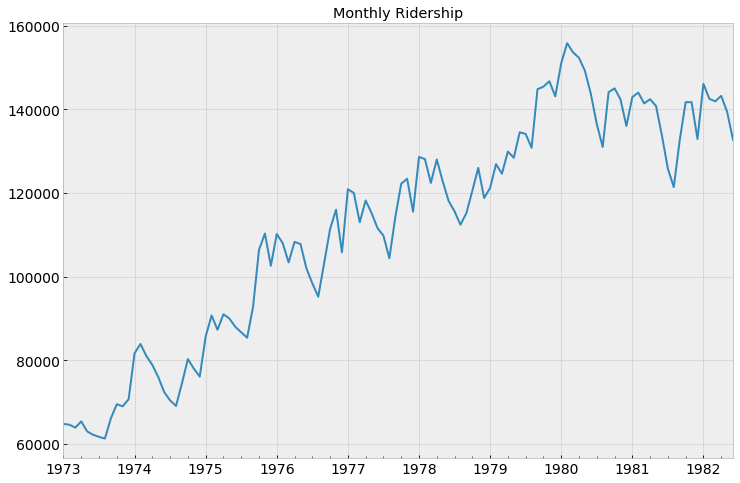

In [54]:
data_test.riders.plot(figsize=(12,8), title= 'Monthly Ridership', fontsize=14)
plt.savefig('month_ridership.png', bbox_inches='tight')

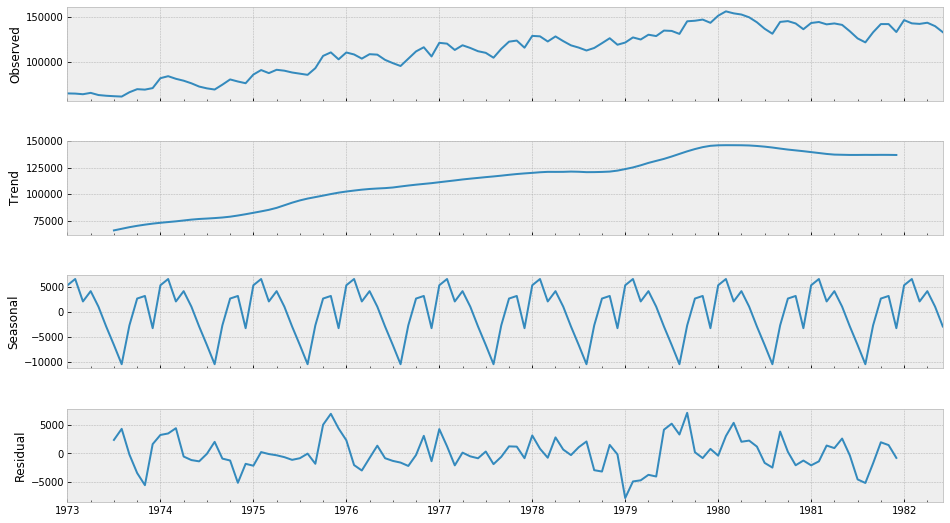

In [55]:
decomposition = seasonal_decompose(data_test.riders, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [56]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


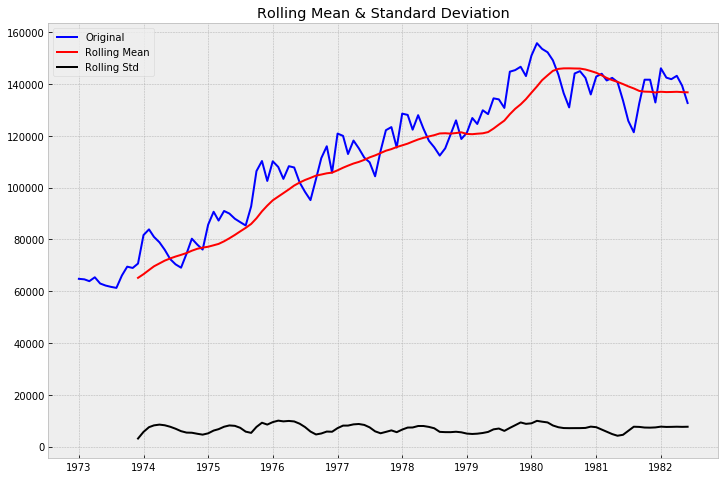

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [57]:
test_stationarity(data_test.riders)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


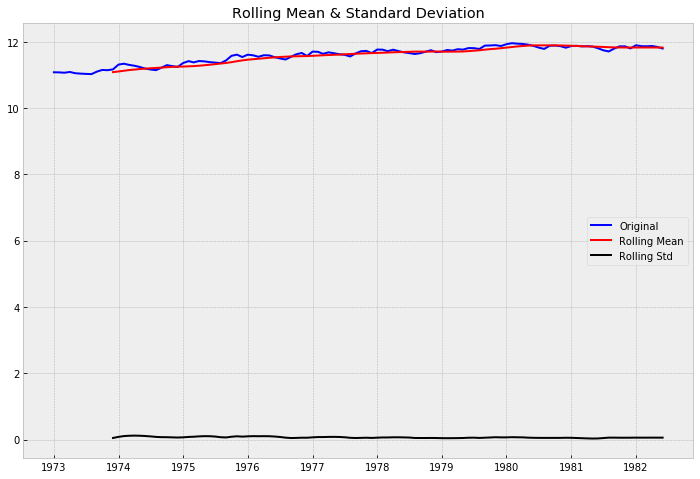

Results of Dickey-Fuller Test:
Test Statistic                  -1.677830
p-value                          0.442570
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [58]:
data_test.riders_log= data_test.riders.apply(lambda x: np.log(x))  
test_stationarity(data_test.riders_log)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


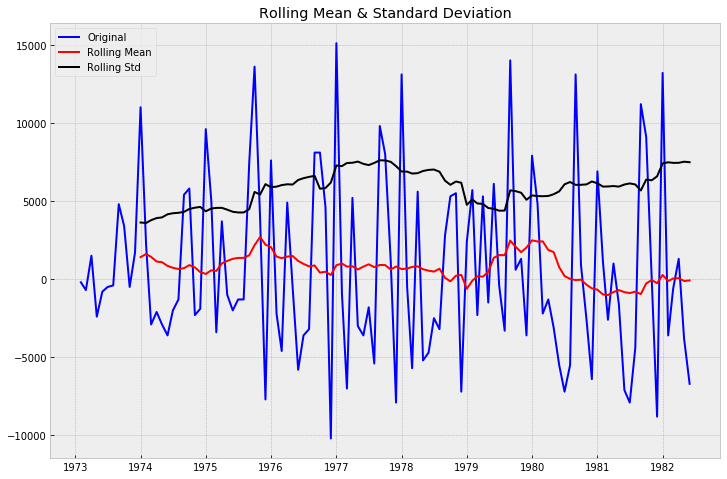

Results of Dickey-Fuller Test:
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [59]:
data_test['first_difference'] = data_test.riders - data_test.riders.shift(1)  
test_stationarity(data_test.first_difference.dropna(inplace=False))

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


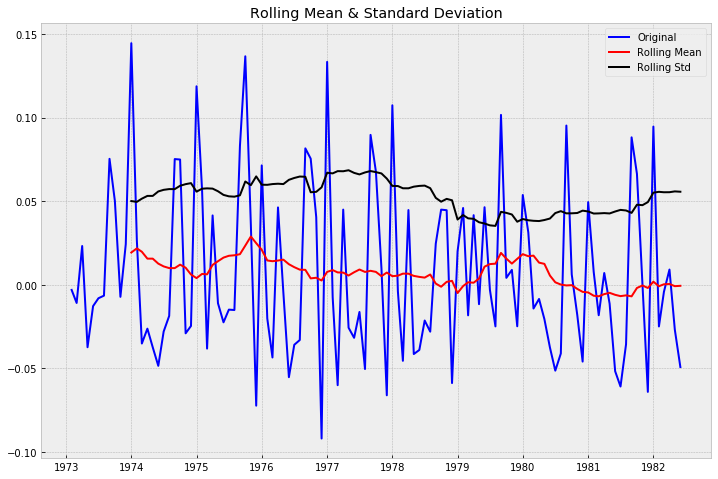

Results of Dickey-Fuller Test:
Test Statistic                  -2.047539
p-value                          0.266126
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [60]:
data_test['log_first_difference'] = data_test.riders_log - data_test.riders_log.shift(1)  
test_stationarity(data_test.log_first_difference.dropna(inplace=False))

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


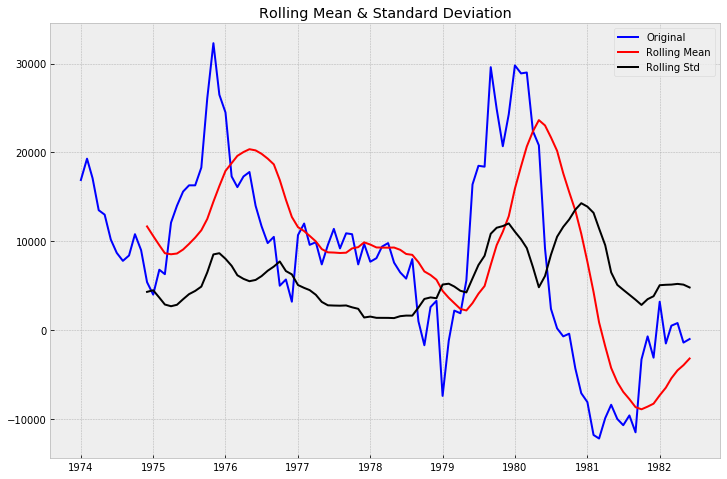

Results of Dickey-Fuller Test:
Test Statistic                 -2.469741
p-value                         0.123011
#Lags Used                      3.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


In [61]:
data_test['seasonal_difference'] = data_test.riders - data_test.riders.shift(12)  
test_stationarity(data_test.seasonal_difference.dropna(inplace=False))

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


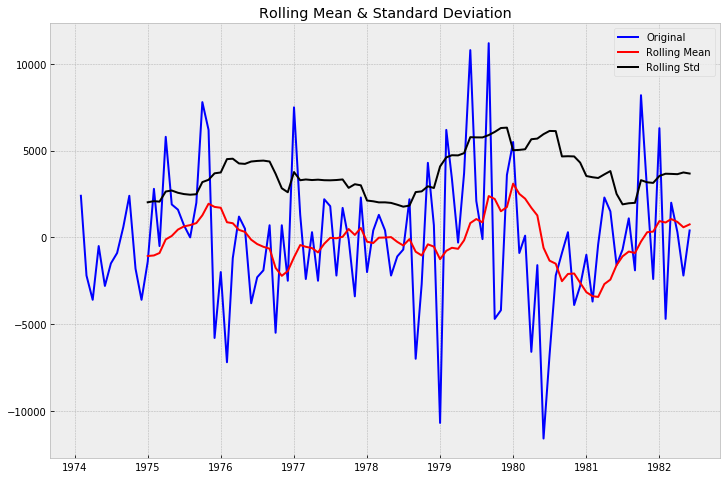

Results of Dickey-Fuller Test:
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [62]:
data_test['seasonal_first_difference'] = data_test.first_difference - data_test.first_difference.shift(12)  
test_stationarity(data_test.seasonal_first_difference.dropna(inplace=False))

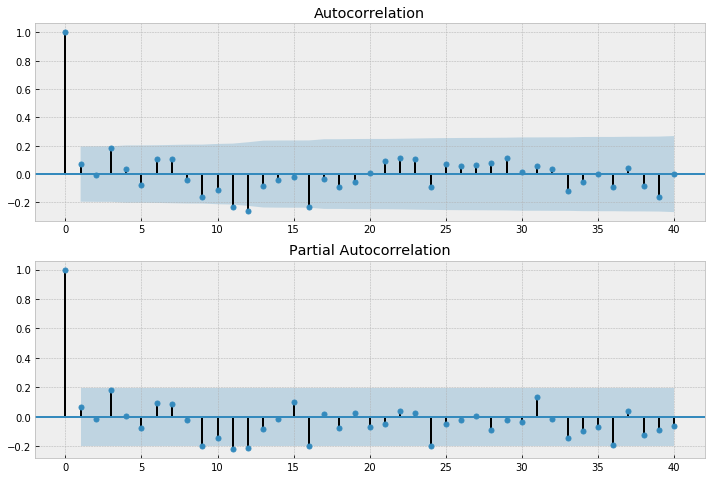

In [63]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_test.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_test.seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [64]:
mod = sm.tsa.statespace.SARIMAX(data_test.riders, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                             riders   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                -976.135
Date:                            Wed, 22 Nov 2017   AIC                           1956.271
Time:                                    02:02:04   BIC                           1961.743
Sample:                                01-01-1973   HQIC                          1958.492
                                     - 06-01-1982                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.1377      0.050     -2.757      0.006      -0.236      -0.040
sigma2      1.424e+07   2.62e-10   

In [65]:
mod = sm.tsa.statespace.SARIMAX(data_test.riders, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                             riders   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -970.257
Date:                            Wed, 22 Nov 2017   AIC                           1946.514
Time:                                    02:02:11   BIC                           1954.723
Sample:                                01-01-1973   HQIC                          1949.845
                                     - 06-01-1982                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5590      0.084      6.678      0.000       0.395       0.723
ma.S.L12      -0.9981      0.117   

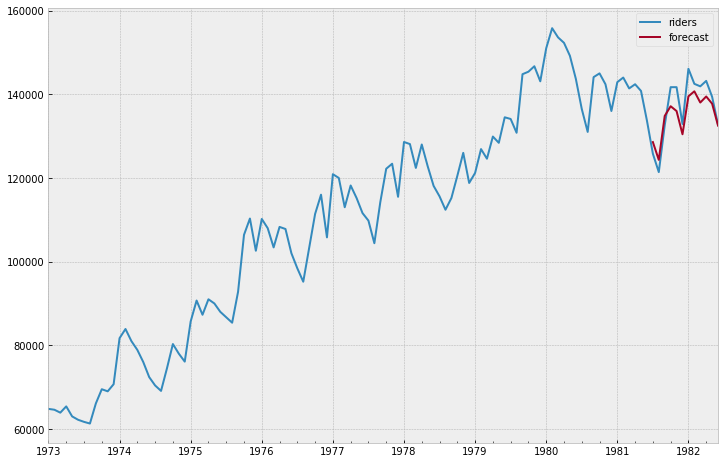

In [68]:
data_test['forecast'] = results.predict(start = 102, end= 114, dynamic= True)  
data_test[['riders', 'forecast']].plot(figsize=(12, 8)) 
plt.savefig('ts_df_predict.png', bbox_inches='tight')

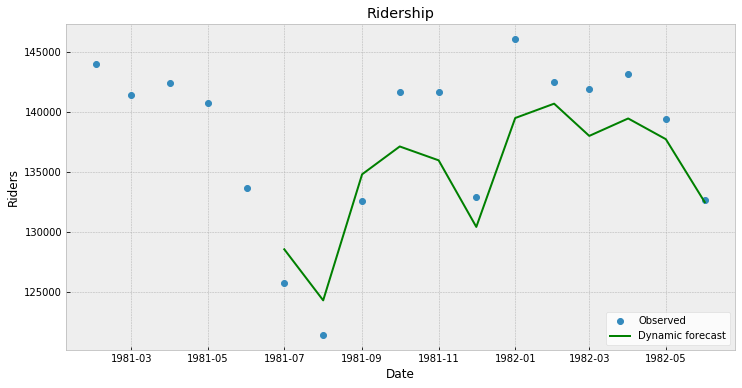

In [70]:
npredict = data_test.riders['1982'].shape[0]
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Ridership', xlabel='Date', ylabel='Riders')
ax.plot(data_test.index[-npredict-npre+1:], data_test.ix[-npredict-npre+1:, 'riders'], 'o', label='Observed')
ax.plot(data_test.index[-npredict-npre+1:], data_test.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
plt.savefig('ts_predict_compare.png', bbox_inches='tight')

In [71]:
start = datetime.datetime.strptime("1982-07-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= data_test.columns)
data_test = pd.concat([data_test, future])

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


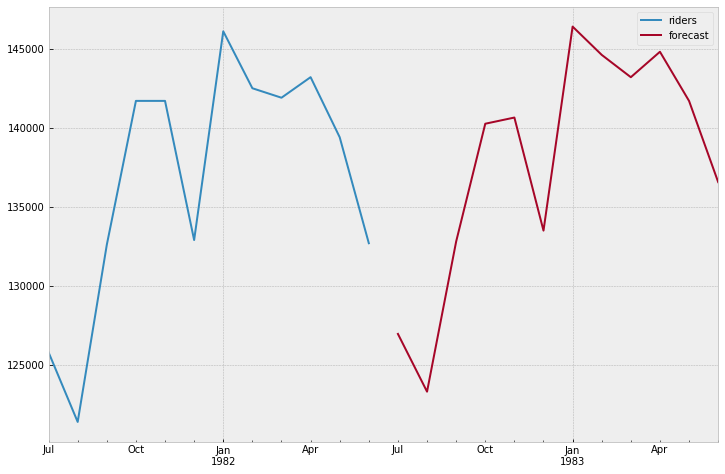

In [72]:
data_test['forecast'] = results.predict(start = 114, end = 125, dynamic= True)  
data_test[['riders', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 
plt.savefig('ts_predict_future.png', bbox_inches='tight')